### Setting up Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My Drive/SML/Project

/content/drive/My Drive/SML/Project


In [3]:
import os
os.listdir()

['test-public.csv',
 'sample.csv',
 'train.txt',
 'nodes.json',
 'sample.txt',
 'test.out',
 'My_SML_Rough.ipynb',
 'output.csv',
 'SML_Vighnesh.ipynb']

### Rough work

In [0]:
"""
import numpy as np

#Generate edge list
first_node = []
second_node = []
degree = {}

f = open("train.txt", 'r')
for line in f:
  list1 = list(map(int,line.strip("\n").split()))
  degree[list1[0]] = len(list1)-1
  for i in range(1,len(list1)):
    first_node.append(list1[0])
    second_node.append(list1[i])

edge_list = np.stack((first_node,second_node), axis=-1)
print(edge_list[:20])
print(len(edge_list))
all_nodes = list(set(first_node + second_node))
print(all_nodes[:20])
print(len(all_nodes))
f.close()
"""

[[   0 2860]
 [   0 3117]
 [   1  318]
 [   1 1610]
 [   1 1776]
 [   1 1865]
 [   1 2283]
 [   1 2507]
 [   1 3076]
 [   1 3108]
 [   1 3182]
 [   1 3357]
 [   1 3675]
 [   1 4040]
 [   2  164]
 [   2  413]
 [   2 1448]
 [   2 1650]
 [   2 3119]
 [   2 3238]]
53872
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
4016


In [0]:
#print(edge_list[-10:])
#print(all_nodes[-10:])

[[4083 3423]
 [4083 3698]
 [4084  170]
 [4084  481]
 [4084 1065]
 [4084 1348]
 [4084 2101]
 [4084 2321]
 [4084 3244]
 [4084 3879]]
[4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084]


In [0]:
"""
#Generate adjacency matrix
norows = len(all_nodes)
adj_matrix = np.zeros((norows,norows), dtype=int)
#adj_matrix = np.zeros((norows,norows), dtype=int)
f = open("train.txt", 'r')
for line in f:
  list1 = list(map(int,line.strip("\n").split()))
  for i in range(1, len(list1)):
    adj_matrix[list1[0]][list1[i]] = 1
    adj_matrix[list1[i]][list1[0]] = 1

#np.savetxt("test.out", matrix, delimiter=',')
print(adj_matrix.shape)
f.close()
"""

'\n#Generate adjacency matrix\nnorows = len(all_nodes)\nadj_matrix = np.zeros((norows,norows), dtype=int)\n#adj_matrix = np.zeros((norows,norows), dtype=int)\nf = open("train.txt", \'r\')\nfor line in f:\n  list1 = list(map(int,line.strip("\n").split()))\n  for i in range(1, len(list1)):\n    adj_matrix[list1[0]][list1[i]] = 1\n    adj_matrix[list1[i]][list1[0]] = 1\n\n#np.savetxt("test.out", matrix, delimiter=\',\')\nprint(adj_matrix.shape)\nf.close()\n'

In [0]:
"""
unconnected_nodes = []

k = 0
for i in range(len(all_nodes)):
  print(i)
  for j in range(k,len(all_nodes)):
    if i != j:
      try:
        n = nx.shortest_path_length(G, all_nodes[i], all_nodes[j])
        if n <=2:
          if adj_matrix[i,j] == 0:
            unconnected_nodes.append([all_nodes[i],all_nodes[j]])
      except:
        pass
  k = k + 1
print(len(unconnected_nodes))
"""


### Initialise Experiment

In [4]:
import networkx as nx

G=nx.read_adjlist("train.txt", nodetype=int, create_using=nx.Graph())
#G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph())
all_nodes = sorted(G.nodes).copy()

adj_matrix = nx.to_numpy_array(G, nodelist = all_nodes, dtype = int)
print(type(adj_matrix))
print(adj_matrix)
m,n = adj_matrix.shape
print(m,n)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4016 4016


In [5]:
print(len(all_nodes))
print(all_nodes[4015])
print(type(all_nodes))
print(len(sorted(G.nodes)))
sorted(G.nodes)[4015]

4016
4084
<class 'list'>
4016


4084

In [6]:
print(nx.number_connected_components(G))
print(len(G.nodes))
print(len(G.edges))
print(G.edges)
print(sorted(nx.common_neighbors(G,0,2860)))

34
4016
26937
[(0, 2860), (0, 3117), (2860, 3117), (3117, 2302), (1, 318), (1, 1610), (1, 1776), (1, 1865), (1, 2283), (1, 2507), (1, 3076), (1, 3108), (1, 3182), (1, 3357), (1, 3675), (1, 4040), (318, 1865), (318, 2711), (318, 3108), (318, 3357), (318, 4040), (1610, 266), (1610, 646), (1610, 1388), (1610, 2547), (1610, 3764), (1610, 3867), (1610, 4021), (1776, 1208), (1776, 1642), (1776, 1865), (1776, 3422), (1776, 3837), (1865, 28), (1865, 328), (1865, 1783), (1865, 2283), (1865, 2507), (1865, 3076), (1865, 3108), (1865, 3182), (1865, 3357), (1865, 3675), (1865, 3711), (1865, 4040), (2283, 1183), (2283, 3182), (2283, 3675), (2507, 2203), (2507, 3035), (2507, 3675), (2507, 4065), (3076, 205), (3076, 206), (3076, 271), (3076, 275), (3076, 303), (3076, 551), (3076, 772), (3076, 896), (3076, 1181), (3076, 1211), (3076, 1313), (3076, 1678), (3076, 1786), (3076, 1904), (3076, 2147), (3076, 2349), (3076, 2466), (3076, 2573), (3076, 2626), (3076, 2647), (3076, 2678), (3076, 2711), (3076, 303

In [7]:
print(G.degree[1])

12


### Approach 2 (Extra graph features)

In [0]:
G.add_node(32)
G.add_node(1611)
G.add_node(2008)
G.add_node(2451)
G.add_node(2692)
G.add_node(2837)

In [13]:
nonodes = len(all_nodes)

unconnected_nodes = []

for i in range(nonodes):
  print(i)
  for j in range(i,nonodes):
    if i != j:
      #try:
      #n = nx.shortest_path_length(G, all_nodes[i], all_nodes[j])
      #if n == 2:
      if adj_matrix[i,j] == 0:
        unconnected_nodes.append([all_nodes[i],all_nodes[j]])
      #except:
      #pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
print(len(unconnected_nodes))
print(sorted(nx.common_neighbors(G,0, 2860)))
print(list(set(sorted(G.neighbors(0))).intersection(set(sorted(G.neighbors(2860))))))
print(type(G.neighbors))

8035185
[3117]
[3117]
<class 'method'>


In [0]:
import math
import random
from scipy import spatial
from numpy.linalg import norm

ncn = []
njc = []
naa = []
nra = []
npa = []
nnd = []
ntn = []
nud = []
nvd = []
nkeycos = []
nvencos = []
nnumpap1 = []
nnumpap2 = []
nl = []

for it in random.sample(unconnected_nodes,404055):
  u = it[0]
  v = it[1]
  nu = sorted(G.neighbors(u))
  nv = sorted(G.neighbors(v))
  cn = sorted(nx.common_neighbors(G,u,v))
  ncn.append(len(cn))
  if len(list(set(nu).union(set(nv)))) == 0:
    njc.append(0)
  else:
    njc.append(len(cn)/float(len(list(set(nu).union(set(nv))))))
  sumaa = 0
  for w in cn:
    sumaa += 1/float(math.log(G.degree[w]))
  naa.append(sumaa)
  sumra = 0
  for w in cn:
    sumra += 1/float(G.degree[w])
  nra.append(sumra)
  npa.append(G.degree[u]*G.degree[v])
  if G.degree[u] == 0 or G.degree[v] == 0:
    nnd.append(0)
  else:
    nnd.append(len(cn)/math.sqrt(G.degree[u]*G.degree[v]))
  ntn.append(len(list(set(nu).union(set(nv)))))
  nud.append(G.degree[u])
  nvd.append(G.degree[v])
  if norm(key_matrix[u]) == 0 or norm(key_matrix[v]) == 0:
    nkeycos.append(0)
  else:
    nkeycos.append(1 - spatial.distance.cosine(key_matrix[u], key_matrix[v]))
  if norm(ven_matrix[u]) == 0 or norm(ven_matrix[v]) == 0:
    nvencos.append(0)
  else:
    nvencos.append(1 - spatial.distance.cosine(ven_matrix[u], ven_matrix[v]))
  nnumpap1.append(num_pap_arr[u])
  nnumpap2.append(num_pap_arr[v])
  nl.append(0)


In [0]:
import math

pcn = []
pjc = []
paa = []
pra = []
ppa = []
pnd = []
ptn = []
pud = []
pvd = []
pkeycos = []
pvencos = []
pnumpap1 = []
pnumpap2 = []
pl = []

for it in G.edges:
  u = it[0]
  v = it[1]
  nu = sorted(G.neighbors(u))
  nv = sorted(G.neighbors(v))
  cn = sorted(nx.common_neighbors(G,u,v))
  pcn.append(len(cn))
  pjc.append(len(cn)/float(len(list(set(nu).union(set(nv))))))
  sumaa = 0
  for w in cn:
    sumaa += 1/float(math.log(G.degree[w]))
  paa.append(sumaa)
  sumra = 0
  for w in cn:
    sumra += 1/float(G.degree[w])
  pra.append(sumra)
  ppa.append(G.degree[u]*G.degree[v])
  pnd.append(len(cn)/math.sqrt(G.degree[u]*G.degree[v]))
  ptn.append(len(list(set(nu).union(set(nv)))))
  pud.append(G.degree[u])
  pvd.append(G.degree[v])
  if norm(key_matrix[u]) == 0 or norm(key_matrix[v]) == 0:
    pkeycos.append(0)
  else:
    pkeycos.append(1 - spatial.distance.cosine(key_matrix[u], key_matrix[v]))
  if norm(ven_matrix[u]) == 0 or norm(ven_matrix[v]) == 0:
    pvencos.append(0)
  else:
    pvencos.append(1 - spatial.distance.cosine(ven_matrix[u], ven_matrix[v]))
  pnumpap1.append(num_pap_arr[u])
  pnumpap2.append(num_pap_arr[v])
  pl.append(1)


In [17]:
import pandas as pd

neg = pd.DataFrame(list(zip(ncn, njc, naa, nra, npa, nnd, ntn, nud, nvd, nkeycos, nvencos, nnumpap1, nnumpap2)),
                   columns=['CN', 'JC', 'AA', 'RA', 'PA', 'ND', 'TN', 'UD', 'VD', 'KEY_COS', 'VEN_COS', 'NUM_PAP1', 'NUM_PAP2']) #, nvencos, nkeycos, nnumpap1, nnumpap2)))

print(neg.head())
print(neg.shape)

   CN   JC   AA   RA   PA   ND  ...  UD   VD   KEY_COS   VEN_COS  NUM_PAP1  NUM_PAP2
0   0  0.0  0.0  0.0  160  0.0  ...  10   16  0.688247  0.462910        12        40
1   0  0.0  0.0  0.0  130  0.0  ...   5   26  0.579066  0.102598         6        45
2   0  0.0  0.0  0.0  135  0.0  ...   9   15  0.587137  0.169031         6        12
3   0  0.0  0.0  0.0  888  0.0  ...   8  111  0.536745  0.166667         5        39
4   0  0.0  0.0  0.0   42  0.0  ...   7    6  0.483046  0.353553         5         5

[5 rows x 13 columns]
(404055, 13)


In [18]:
pos = pd.DataFrame(list(zip(pcn, pjc, paa, pra, ppa, pnd, ptn, pud, pvd, pkeycos, pvencos, pnumpap1, pnumpap2)), 
                   columns=['CN', 'JC', 'AA', 'RA', 'PA', 'ND', 'TN', 'UD', 'VD', 'KEY_COS', 'VEN_COS', 'NUM_PAP1', 'NUM_PAP2']) #, pvencos, pkeycos, pnumpap1, pnumpap2)))

print(pos.head())
print(pos.shape)

   CN        JC        AA        RA  ...   KEY_COS   VEN_COS  NUM_PAP1  NUM_PAP2
0   1  0.333333  0.910239  0.333333  ...  0.848875  0.500000         6         5
1   1  0.250000  1.442695  0.500000  ...  0.628828  0.377964         6         8
2   1  0.250000  1.442695  0.500000  ...  0.530330  0.377964         5         8
3   0  0.000000  0.000000  0.000000  ...  0.688530  0.668153         8        15
4   4  0.285714  1.602151  0.341667  ...  0.764866  0.530330        16         7

[5 rows x 13 columns]
(26937, 13)


In [19]:
sam = pd.concat([pos,neg], ignore_index=True)
print(sam.shape)
print(sam.head())
print(sam.dtypes)

(430992, 13)
   CN        JC        AA        RA  ...   KEY_COS   VEN_COS  NUM_PAP1  NUM_PAP2
0   1  0.333333  0.910239  0.333333  ...  0.848875  0.500000         6         5
1   1  0.250000  1.442695  0.500000  ...  0.628828  0.377964         6         8
2   1  0.250000  1.442695  0.500000  ...  0.530330  0.377964         5         8
3   0  0.000000  0.000000  0.000000  ...  0.688530  0.668153         8        15
4   4  0.285714  1.602151  0.341667  ...  0.764866  0.530330        16         7

[5 rows x 13 columns]
CN            int64
JC          float64
AA          float64
RA          float64
PA            int64
ND          float64
TN            int64
UD            int64
VD            int64
KEY_COS     float64
VEN_COS     float64
NUM_PAP1      int64
NUM_PAP2      int64
dtype: object


In [20]:
lab = pl+nl
print(len(lab))
print(sam.shape)

430992
(430992, 13)


### Extracting node information

In [8]:
import json

with open('nodes.json') as p:
  data = json.load(p)

print(data)

[{'first': 4, 'id': 0, 'keyword_0': 1, 'keyword_10': 1, 'keyword_13': 1, 'keyword_15': 1, 'keyword_2': 1, 'keyword_33': 1, 'keyword_34': 1, 'keyword_37': 1, 'keyword_38': 1, 'keyword_41': 1, 'keyword_43': 1, 'keyword_46': 1, 'keyword_49': 1, 'keyword_50': 1, 'keyword_52': 1, 'keyword_6': 1, 'keyword_8': 1, 'last': 0, 'num_papers': 6, 'venue_13': 1, 'venue_281': 1, 'venue_5': 1, 'venue_87': 1}, {'first': 9, 'id': 1, 'keyword_0': 1, 'keyword_1': 1, 'keyword_10': 1, 'keyword_11': 1, 'keyword_13': 1, 'keyword_15': 1, 'keyword_17': 1, 'keyword_18': 1, 'keyword_2': 1, 'keyword_26': 1, 'keyword_27': 1, 'keyword_29': 1, 'keyword_31': 1, 'keyword_36': 1, 'keyword_37': 1, 'keyword_4': 1, 'keyword_40': 1, 'keyword_41': 1, 'keyword_42': 1, 'keyword_43': 1, 'keyword_46': 1, 'keyword_48': 1, 'keyword_49': 1, 'keyword_6': 1, 'keyword_7': 1, 'keyword_8': 1, 'last': 1, 'num_papers': 16, 'venue_1': 1, 'venue_13': 1, 'venue_2': 1, 'venue_27': 1, 'venue_40': 1, 'venue_5': 1, 'venue_57': 1, 'venue_61': 1},

In [9]:
import numpy as np

key_matrix = np.zeros((4085,53), dtype=int)
for item in data:
  i = item['id']
  for j in range(53):
    keystr = 'keyword_'+str(j)
    if keystr in item:
      key_matrix[i][j] = 1

print(key_matrix.shape)
print(key_matrix)


(4085, 53)
[[1 0 1 ... 1 0 1]
 [1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]]


In [10]:
ven_matrix = np.zeros((4085,348), dtype=int)
for item in data:
  i = item['id']
  for j in range(348):
    venstr = 'venue_'+str(j)
    if venstr in item:
      ven_matrix[i][j] = 1

print(ven_matrix.shape)
print(ven_matrix)

(4085, 348)
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
num_pap_arr = np.zeros((4085,), dtype=int)
for item in data:
  i = item['id']
  val = item['num_papers']
  num_pap_arr[i] = val

print(num_pap_arr.shape)
print(num_pap_arr)

(4085,)
[ 6 16  6 ...  5  5 10]


In [0]:
"""
#Testing cosine similarity (for SELF PURPOSES)
from scipy import spatial
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

print(type(key_matrix[0]))
print(key_matrix[0].shape)
a = key_matrix[0]
b = key_matrix[1]
print(1 - spatial.distance.cosine(a, b))
print(dot(a, b)/(norm(a)*norm(b)))
print(cosine_similarity([a], [b]))
"""

<class 'numpy.ndarray'>
(53,)
0.5707817929853929
0.570781792985393
[[0.57078179]]


### Approach 1 (Baseline)

In [0]:
import operator
nonodes = len(all_nodes)

unconnected_nodes = []
#dict1 = {}

for i in range(nonodes):
  print(i)
  for j in range(i,nonodes):
    if i != j:
      if adj_matrix[i,j] == 0:
        unconnected_nodes.append([all_nodes[i],all_nodes[j]])
        #dict1[(all_nodes[i],all_nodes[j])] = len(sorted(nx.common_neighbors(G,all_nodes[i],all_nodes[j])))

#sorted_dict1 = sorted(dict1.items(), key=operator.itemgetter(1))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
import random
from scipy import spatial
from numpy.linalg import norm

neg_source = []
neg_target = []
neg_source_deg = []
neg_target_deg = []
neg_common = []
neg_key_cos = []
neg_ven_cos = []
#neg_num_pap = []
neg_label = []

for item in random.sample(unconnected_nodes,380000):
  first = item[0][0]
  second = item[0][1]
  neg_source.append(first)
  neg_target.append(second)
  neg_source_deg.append(G.degree[first])
  neg_target_deg.append(G.degree[second])
  neg_common.append(item[1])
  if norm(key_matrix[first]) == 0 or norm(key_matrix[second]) == 0:
    neg_key_cos.append(0)
  else:
    neg_key_cos.append(1 - spatial.distance.cosine(key_matrix[first], key_matrix[second]))
  if norm(ven_matrix[first]) == 0 or norm(ven_matrix[second]) == 0:
    neg_ven_cos.append(0)
  else:
    neg_ven_cos.append(1 - spatial.distance.cosine(ven_matrix[first], ven_matrix[second]))
  #neg_num_pap.append(num_pap_arr[first])
  neg_label.append(0)


In [0]:
print(sorted_dict1[0])
print(sorted_dict1[1])
print(sorted_dict1[270000])

((0, 1), 0)
((0, 2), 0)
((73, 3954), 0)


In [0]:
len(sorted_dict1)

8035185

In [0]:
for item in sorted_dict1[:2]:
  print(item[0][0])
  print(item[0][1])
  print(G.degree[item[0][0]])
  print(G.degree[item[0][1]])
  print(item[1])


0
1
2
12
0
0
2
2
6
0


In [0]:
"""
#NaN testing
from numpy.linalg import norm
from numpy import isnan

count1 = 0
count2 = 0
for i in range(4085):
  if norm(key_matrix[i]) == 0:
    count1 += 1
  if norm(ven_matrix[i]) == 0:
    count2 += 1
    print(i)

print(count1)
print(count2)
print(231 in G.nodes)
a = 1 - spatial.distance.cosine([1,2,3,4], [0,0,0,0])
print(a)
print(isnan(a))
"""

1512
1919
3321
1
3
True
nan
True


/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [0]:
pos_source = []
pos_target = []
pos_source_deg = []
pos_target_deg = []
pos_common = []
pos_key_cos = []
pos_ven_cos = []
pos_label = []

for item in G.edges:
  pos_source.append(item[0])
  pos_target.append(item[1])
  pos_source_deg.append(G.degree[item[0]])
  pos_target_deg.append(G.degree[item[1]])
  pos_common.append(len(sorted(nx.common_neighbors(G,item[0],item[1]))))
  if norm(key_matrix[item[0]]) == 0 or norm(key_matrix[item[1]]) == 0:
    pos_key_cos.append(0)
  else:
    pos_key_cos.append(1 - spatial.distance.cosine(key_matrix[item[0]], key_matrix[item[1]]))
  if norm(ven_matrix[item[0]]) == 0 or norm(ven_matrix[item[1]]) == 0:
    pos_ven_cos.append(0)
  else:
    pos_ven_cos.append(1 - spatial.distance.cosine(ven_matrix[item[0]], ven_matrix[item[1]]))
  pos_label.append(1)
  #pos_source.append(item[1])
  #pos_target.append(item[0])
  #pos_source_deg.append(G.degree[item[1]])
  #pos_target_deg.append(G.degree[item[0]])
  #pos_common.append(len(sorted(nx.common_neighbors(G,item[1],item[0]))))
  #pos_label.append(1)

In [0]:
import pandas as pd

negative = pd.DataFrame(list(zip(neg_source_deg, neg_target_deg, neg_common, neg_ven_cos, neg_key_cos))) #neg_source, neg_target, 
                      #columns = ['Source', 'Target', 'Source_Degree', 'Target_Degree', 'Common Neighbours', 'Keyword cosine'])

#negative = np.stack((neg_source, neg_target, neg_source_deg, neg_target_deg, neg_common), axis=-1)
print(negative.head())
print(negative.shape)

   0   1  2         3         4
0  9   7  0  0.251976  0.681623
1  4  14  0  0.188982  0.621874
2  4   9  0  0.000000  0.411765
3  5   8  0  0.000000  0.650000
4  6  14  0  0.209657  0.550689
(380000, 5)


In [0]:
positive = pd.DataFrame(list(zip(pos_source_deg, pos_target_deg, pos_common, pos_ven_cos, pos_key_cos))) #pos_source, pos_target, 
print(positive.head())
print(positive.shape)

    0  1  2         3         4
0   2  2  1  0.500000  0.848875
1   2  3  1  0.377964  0.628828
2   2  3  1  0.377964  0.530330
3   3  5  0  0.668153  0.688530
4  12  6  4  0.530330  0.764866
(26937, 5)


In [0]:
#samples = np.concatenate((positive,negative))
samples = pd.concat([positive,negative], ignore_index=True)
print(samples.shape)
print(samples.head())
print(samples.dtypes)

(406937, 5)
    0  1  2         3         4
0   2  2  1  0.500000  0.848875
1   2  3  1  0.377964  0.628828
2   2  3  1  0.377964  0.530330
3   3  5  0  0.668153  0.688530
4  12  6  4  0.530330  0.764866
0      int64
1      int64
2      int64
3    float64
4    float64
dtype: object


In [0]:
labels = pos_label+neg_label
print(len(labels))
print(samples.shape)

406937
(406937, 5)


### Testing for self purposes

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sam, lab, 
                                                test_size = 0.2, 
                                                random_state = 42)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

(325549, 3)
(81388, 3)
325549
81388


In [0]:
print(y_train[:20])

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
!pip install xgboost

In [0]:
#from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#lr = LogisticRegression(class_weight="balanced", max_iter=1000)
#lr.fit(x_train, y_train)
xgb = XGBClassifier()
xgb.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions = xgb.predict_proba(x_test)

In [0]:
print(predictions[:5])
print(predictions.shape)

[[0.99360245 0.00639757]
 [0.9973323  0.00266772]
 [0.99719495 0.00280506]
 [0.9968164  0.00318363]
 [0.86216486 0.13783517]]
(81388, 2)


In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions[:,1])

0.9795373490288489

### Feature Selection

Note: This section is only for visualisation purposes, and is inspired from: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

#### Rough Work

In [0]:
"""
import numpy as np
import matplotlib.pyplot as plt

imp = xgb.feature_importances_

std = np.std([tree.feature_importances_ for tree in xgb.estimators_],axis=0)
indices = np.argsort(imp)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(sam.shape[1]), imp[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(sam.shape[1]), indices)
plt.xlim([-1, sam.shape[1]])
plt.show()
"""
pd.DataFrame({'Variable':sam.columns,
              'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False)


,Variable,Importance
3,RA,0.897845
8,VD,0.016486
2,AA,0.016268
5,ND,0.012395
10,VEN_COS,0.010612
0,CN,0.008316
1,JC,0.008012
9,KEY_COS,0.006582
4,PA,0.005044
7,UD,0.004902


#### (i) Univariate Selection

In [0]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(sam,lab)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(sam.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(13,'Score'))

    Features         Score
4         PA  2.314008e+08
0         CN  4.498004e+06
7         UD  1.612681e+06
2         AA  1.223302e+06
6         TN  9.959021e+05
11  NUM_PAP1  5.369963e+05
8         VD  3.829762e+05
3         RA  1.338999e+05
5         ND  1.114522e+05
1         JC  7.235525e+04
12  NUM_PAP2  6.990826e+04
10   VEN_COS  5.227645e+03
9    KEY_COS  7.588774e+02


#### (ii) Feature Importance

    Features  Importance
3         RA    0.897845
8         VD    0.016486
2         AA    0.016268
5         ND    0.012395
10   VEN_COS    0.010612
0         CN    0.008316
1         JC    0.008012
9    KEY_COS    0.006582
4         PA    0.005044
7         UD    0.004902
6         TN    0.004674
11  NUM_PAP1    0.004617
12  NUM_PAP2    0.004247


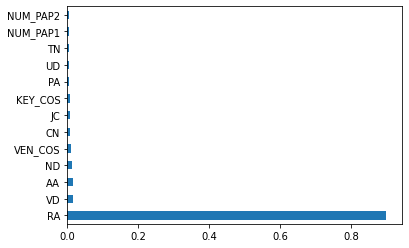

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

print(pd.DataFrame({'Features':sam.columns,
              'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False))
feat_importances = pd.Series(xgb.feature_importances_, index=sam.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

#### (iii) Correlation matrix with heatmap

(430992, 14)


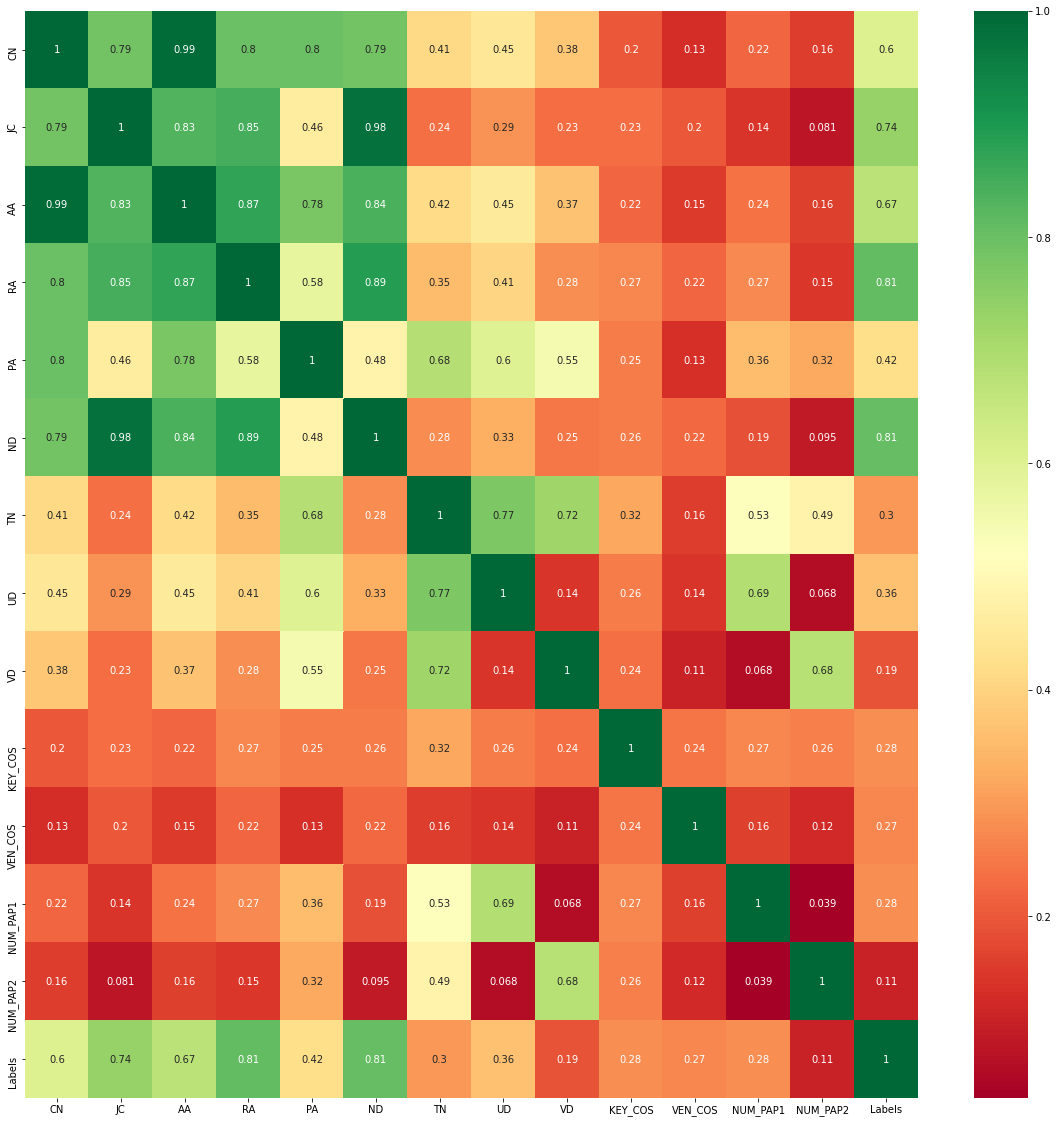

In [0]:
import pandas as pd
import seaborn as sns

data = sam.copy()
data['Labels'] = lab
print(data.shape)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Reading from test file for Approach 1

In [0]:
from numpy.linalg import norm
from scipy import spatial

g = open("test-public.csv", 'r')
h = open("output.csv", 'w')
print("Id,Predicted", file=h)

iden = []
s = []
t = []
s_deg = []
t_deg = []
s_t_common = []
key_cos = []
ven_cos = []

lines = g.read().splitlines()
for i in range(1,len(lines)):
  line = list(map(int,lines[i].split(",")))
  #print(line)
  iden.append(line[0])
  s.append(line[1])
  t.append(line[2])
  if line[1] not in G.nodes and line[2] in G.nodes:
    s_deg.append(0)
    t_deg.append(G.degree[line[2]])
    s_t_common.append(0)
  elif line[1] in G.nodes and line[2] not in G.nodes:
    s_deg.append(G.degree[line[1]])
    t_deg.append(0)
    s_t_common.append(0)
  elif line[1] not in G.nodes and line[2] not in G.nodes:
    s_deg.append(0)
    t_deg.append(0)
    s_t_common.append(0)
  elif line[1] in G.nodes and line[2] in G.nodes:
    s_deg.append(G.degree[line[1]])
    t_deg.append(G.degree[line[2]])
    s_t_common.append(len(sorted(nx.common_neighbors(G,line[1],line[2]))))
  if norm(key_matrix[line[1]]) == 0 or norm(key_matrix[line[2]]) == 0:
    key_cos.append(0)
  else:
    key_cos.append(1 - spatial.distance.cosine(key_matrix[line[1]], key_matrix[line[2]]))
  if norm(ven_matrix[line[1]]) == 0 or norm(ven_matrix[line[2]]) == 0:
    ven_cos.append(0)
  else:
    ven_cos.append(1 - spatial.distance.cosine(ven_matrix[line[1]], ven_matrix[line[2]]))
    
g.close()
print(len(iden))
print(len(s_deg))

2000
2000


In [0]:
"""
#Testing the existence of nodes (CAN BE SKIPPED)
temp = list(set(s+t))
print(len(temp))
not_in = []
for item in temp:
  if item not in sorted(G.nodes):
    print(item)
    not_in.append(item)
print(len(not_in))
"""

2210
32
1611
2008
2451
2692
2837
6


In [0]:
testing = pd.DataFrame(list(zip(s_deg,t_deg,s_t_common, ven_cos, key_cos))) #s,t,
#testing = np.stack((s,t,s_deg,t_deg,s_t_common), axis=-1)
print(testing.shape)
print(testing.head())
print(testing.dtypes)

(2000, 5)
    0   1  2         3         4
0  12   3  1  0.250000  0.647150
1   6  51  3  0.000000  0.586302
2  15   5  0  0.433013  0.301511
3  74   3  2  0.321288  0.614636
4  74   3  1  0.160644  0.537484
0      int64
1      int64
2      int64
3    float64
4    float64
dtype: object


In [0]:
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(samples)
samples = scaler.transform(samples)
testing = scaler.transform(testing)
"""

### Reading from test file for Approach 2

In [47]:
import math
from scipy import spatial
from numpy.linalg import norm

g = open("test-public.csv", 'r')
h = open("output.csv", 'w')
print("Id,Predicted", file=h)

iden = []
s = []
t = []
cn = []
jc = []
aa = []
ra = []
pa = []
nd = []
tn = []
ud = []
vd = []
key_cos = []
ven_cos = []
num_pap1 = []
num_pap2 = []

new_nodes = [32,1611,2008,2451,2692,2837]

lines = g.read().splitlines()
for i in range(1,len(lines)):
  line = list(map(int,lines[i].split(",")))
  #print(line)
  u = line[1]
  v = line[2]
  iden.append(line[0])
  s.append(u)
  t.append(v)
  nu = sorted(G.neighbors(u))
  nv = sorted(G.neighbors(v))
  c = sorted(nx.common_neighbors(G,u,v))
  cn.append(len(c))
  if len(list(set(nu).union(set(nv)))) == 0:
    jc.append(0)
  else:
    jc.append(len(c)/float(len(list(set(nu).union(set(nv)))))) #problem
  sumaa = 0
  for w in c:
    sumaa += 1/float(math.log(G.degree[w]))
  aa.append(sumaa)
  sumra = 0
  for w in c:
    sumra += 1/float(G.degree[w])
  ra.append(sumra)
  pa.append(G.degree[u]*G.degree[v])
  if u in new_nodes or v in new_nodes:
    nd.append(0)
  else:
    nd.append(len(c)/math.sqrt(G.degree[u]*G.degree[v]))
  tn.append(len(list(set(nu).union(set(nv)))))
  ud.append(G.degree[u])
  vd.append(G.degree[v])
  if norm(key_matrix[line[1]]) == 0 or norm(key_matrix[line[2]]) == 0:
    key_cos.append(0)
  else:
    key_cos.append(1 - spatial.distance.cosine(key_matrix[line[1]], key_matrix[line[2]]))
  if norm(ven_matrix[line[1]]) == 0 or norm(ven_matrix[line[2]]) == 0:
    ven_cos.append(0)
  else:
    ven_cos.append(1 - spatial.distance.cosine(ven_matrix[line[1]], ven_matrix[line[2]]))
  num_pap1.append(num_pap_arr[u])
  num_pap2.append(num_pap_arr[v])
  
    
g.close()
print(len(iden))

2000


In [22]:
test = pd.DataFrame(list(zip(cn, jc, aa, ra, pa, nd, tn, ud, vd, key_cos, ven_cos, num_pap1, num_pap2)),
                    columns=['CN', 'JC', 'AA', 'RA', 'PA', 'ND', 'TN', 'UD', 'VD', 'KEY_COS', 'VEN_COS', 'NUM_PAP1', 'NUM_PAP2']) #, ven_cos, key_cos, num_pap1, num_pap2)))
#testing = np.stack((s,t,s_deg,t_deg,s_t_common), axis=-1)
print(test.shape)
print(test.head())
print(test.dtypes)

(2000, 13)
   CN        JC        AA        RA  ...   KEY_COS   VEN_COS  NUM_PAP1  NUM_PAP2
0   1  0.071429  0.480898  0.125000  ...  0.647150  0.250000        16         8
1   3  0.055556  0.741783  0.053910  ...  0.586302  0.000000         6        55
2   0  0.000000  0.000000  0.000000  ...  0.301511  0.433013        24         4
3   2  0.026667  0.688355  0.133065  ...  0.614636  0.321288       145         8
4   1  0.013158  0.271085  0.025000  ...  0.537484  0.160644       145         5

[5 rows x 13 columns]
CN            int64
JC          float64
AA          float64
RA          float64
PA            int64
ND          float64
TN            int64
UD            int64
VD            int64
KEY_COS     float64
VEN_COS     float64
NUM_PAP1      int64
NUM_PAP2      int64
dtype: object


### Standard scaling of all features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sam)
sam = scaler.transform(sam)
test = scaler.transform(test)

### Testing for kaggle

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=30, max_depth=10, random_state=0)
xgb.fit(sam, lab)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

#lr = LogisticRegression(class_weight="balanced", max_iter=1000, verbose=True)
#lr.fit(sam, lab)
#per = Perceptron(random_state=42, class_weight="balanced", max_iter=1000, verbose=True)
#per.fit(sam, lab)
#mlp = MLPClassifier(hidden_layer_sizes=(13,), learning_rate_init=0.001, verbose=True, max_iter=1000, random_state=0)
#mlp.fit(sam, lab)
#ada = AdaBoostClassifier(n_estimators=30, random_state=0)
#ada.fit(sam, lab)
rf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0, class_weight="balanced")
rf.fit(sam, lab)
#mnb = MultinomialNB()
#mnb.fit(sam, lab)
#gnb = GaussianNB()
#gnb.fit(sam, lab)
#svm = LinearSVC(class_weight="balanced", random_state=0, max_iter=1000, dual=False)
#svm.fit(sam, lab)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pd.DataFrame({'Variable':sam.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
3,RA,0.349947
1,JC,0.208630
5,ND,0.130695
2,AA,0.128273
0,CN,0.056085
4,PA,0.044503
9,KEY_COS,0.027876
7,UD,0.022897
10,VEN_COS,0.015292
8,VD,0.006438


In [42]:
#predictions = svm.predict(test)
predictions = nn.predict_proba(test)

2000/2000 [==============================] - 0s 15us/step


In [43]:
print(predictions.shape)
print(predictions[:20])
print(type(predictions))

(2000, 2)
[[4.9339044e-01 5.0660956e-01]
 [9.7083652e-01 2.9163510e-02]
 [9.9890476e-01 1.0952353e-03]
 [1.3539004e-01 8.6460996e-01]
 [8.7732625e-01 1.2267372e-01]
 [7.1629918e-01 2.8370082e-01]
 [2.8961933e-01 7.1038067e-01]
 [8.6437941e-02 9.1356206e-01]
 [7.9245168e-01 2.0754832e-01]
 [9.9733567e-01 2.6643276e-03]
 [2.7361703e-01 7.2638297e-01]
 [9.9769676e-01 2.3032725e-03]
 [9.9194574e-01 8.0542564e-03]
 [9.6990442e-01 3.0095547e-02]
 [6.7195845e-01 3.2804155e-01]
 [0.0000000e+00 1.0000000e+00]
 [2.8848648e-05 9.9997115e-01]
 [9.9590325e-01 4.0967166e-03]
 [9.3514335e-01 6.4856678e-02]
 [9.9971592e-01 2.8407574e-04]]
<class 'numpy.ndarray'>


In [0]:
predict = predictions[:,1].tolist()
#predict = predictions[:].tolist()

In [45]:
print(len(predict))
print(predict[:100])

2000
[0.5066095590591431, 0.029163509607315063, 0.0010952353477478027, 0.864609956741333, 0.12267372012138367, 0.2837008237838745, 0.7103806734085083, 0.9135620594024658, 0.2075483202934265, 0.002664327621459961, 0.7263829708099365, 0.0023032724857330322, 0.008054256439208984, 0.030095547437667847, 0.32804155349731445, 1.0, 0.9999711513519287, 0.004096716642379761, 0.06485667824745178, 0.0002840757369995117, 0.6992095112800598, 4.716565911166981e-07, 0.17411506175994873, 0.031184732913970947, 0.6719260811805725, 0.004534989595413208, 3.1732289018648885e-10, 4.808225071428751e-07, 0.002093583345413208, 0.7444077134132385, 0.0040070414543151855, 0.003700345754623413, 0.9999974370002747, 0.04520648717880249, 0.03899165987968445, 0.9997246265411377, 0.8568929433822632, 0.9486619830131531, 0.27146223187446594, 0.9971698522567749, 0.2516166567802429, 0.03205874562263489, 1.1673746485030279e-06, 1.8327073121326976e-05, 0.0012603402137756348, 0.873240053653717, 0.0005179643630981445, 9.3111448

In [0]:
for i in range(len(predict)):
  print(str(iden[i])+","+str(float(predict[i])),file=h)

h.close()

In [0]:
"""
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
"""

### Approach 3 (Node2Vec)

In [0]:
!pip install node2vec

In [0]:
G.add_node(32)
G.add_node(1611)
G.add_node(2008)
G.add_node(2451)
G.add_node(2692)
G.add_node(2837)

In [0]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=100, walk_length=16, num_walks=87)

model = node2vec.fit(window=10, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 87/87 [03:56<00:00,  2.72s/it]


In [0]:
print(len(s), len(t))

2000 2000


In [0]:
len(G.nodes)

4022

In [0]:
from scipy import spatial
testing = [((1 - spatial.distance.cosine(model[str(i)],model[str(j)]))+1)/(2) for i,j in zip(s, t)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
"""
#Tanimoto coefficient
from numpy import dot
from numpy.linalg import norm

#print(dot(a, b)/(norm(a)*norm(b)))
testing1 = []
for i,j in zip(s, t):
  a = dot(model[str(i)],model[str(j)])
  b = norm(model[str(i)])**2
  c = norm(model[str(j)])**2
  testing1.append(a/float(b+c-a))
print(len(testing1))
print(testing1)
"""

2000
[0.34158685456278925, 0.1453381757746364, 0.011179359743746438, 0.13914317918700764, 0.049265635709019, 0.011870999520676339, 0.1887161939036585, 0.27025585560066684, 0.17084943934563357, 0.13197767883231037, 0.1815575539093895, -0.014146871716692799, 0.09292606015471704, 0.17531069038048078, 0.04073062990239382, 0.4417178549620138, 0.24838046812652967, -0.01180140282750628, 0.01273296599435551, 0.02517366996469937, 0.3378607671484717, -0.06115964716058398, 0.012525642180490104, 0.023865455264774064, 0.5645149405917079, -0.002001413957042412, 0.000144066298773713, -0.0001635849933681081, 0.16994315143317607, 0.45584646926577876, 0.1321505541979559, -0.032812429913290204, 0.307839766595415, 0.000803690677179396, -0.05795133351305594, 0.2565989233060311, 0.2082218068501122, 0.21812822901486698, 0.10203393130165951, 0.2644160133275524, 0.1294956361557506, 0.3098897213228713, 0.004982162552217766, 0.06425443595204916, -0.0739448535615825, 0.27433396147448963, 0.06609913879316306, -0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [1]:
print(len(testing))
print(testing)

NameError: ignored

In [0]:
for i in range(len(testing)):
  print(str(iden[i])+","+str(float(testing[i])),file=h)

h.close()